<a href="https://colab.research.google.com/github/kareembadrsaber/electropi.ai_projects/blob/master/Airbnb_Listing_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Panda Setting**

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [119]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [120]:
DATA_PATH = os.path.join(os.getcwd(),'data','/listings (2).csv')
df = pd.read_csv(DATA_PATH)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,816783428767938211,Cool studio 3 min from subway!,47125955,Rebeca,Queens,Long Island City,40.761327,-73.926758,Entire home/apt,110.0,30,9,2023-09-25,0.96,2,363,9,NaN
1,8686040,LARGE MANHATTAN ONE BEDROOM,45608786,Virginia,Manhattan,Inwood,40.859990,-73.928500,Entire home/apt,NaN,30,5,2015-11-22,0.05,1,0,0,NaN
2,12426778,TH BRKLYN,7963317,Rob,Brooklyn,Boerum Hill,40.688340,-73.986010,Private room,NaN,30,0,NaN,NaN,1,0,0,NaN
3,22671517,55 washington,3428456,Yoon,Brooklyn,DUMBO,40.701490,-73.988860,Private room,NaN,30,0,NaN,NaN,1,0,0,NaN
4,35776956,luxury apt in long lsland city \n1min to subway,221012726,Lyn,Queens,Long Island City,40.749010,-73.938980,Private room,NaN,30,1,2019-07-31,0.02,1,0,0,NaN


## **Data Shape , Info , Description**

In [121]:
df.shape

(39319, 18)

It look like the data has 39319 rows and 18 columns

In [122]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm', 'license'], dtype='object')

In [123]:
len(df.columns)

18

# **Info**

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39319 entries, 0 to 39318
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39319 non-null  int64  
 1   name                            39317 non-null  object 
 2   host_id                         39319 non-null  int64  
 3   host_name                       39313 non-null  object 
 4   neighbourhood_group             39319 non-null  object 
 5   neighbourhood                   39319 non-null  object 
 6   latitude                        39319 non-null  float64
 7   longitude                       39319 non-null  float64
 8   room_type                       39319 non-null  object 
 9   price                           24277 non-null  float64
 10  minimum_nights                  39319 non-null  int64  
 11  number_of_reviews               39319 non-null  int64  
 12  last_review                     

In [125]:
important_featutes = ['id', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
                     'latitude', 'longitude', 'name', 'room_type', 'price', 'number_of_reviews',
                     'reviews_per_month', 'minimum_nights', 'availability_365',
                     'number_of_reviews_ltm', 'calculated_host_listings_count', 'last_review', 'license']

important_features_df= df[important_featutes]

In [126]:
important_features_df.isna().sum()

id                                    0
host_id                               0
host_name                             6
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
name                                  2
room_type                             0
price                             15042
number_of_reviews                     0
reviews_per_month                 11805
minimum_nights                        0
availability_365                      0
number_of_reviews_ltm                 0
calculated_host_listings_count        0
last_review                       11805
license                           34212
dtype: int64

In [127]:
important_features_df.dtypes


id                                  int64
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
name                               object
room_type                          object
price                             float64
number_of_reviews                   int64
reviews_per_month                 float64
minimum_nights                      int64
availability_365                    int64
number_of_reviews_ltm               int64
calculated_host_listings_count      int64
last_review                        object
license                            object
dtype: object

In [128]:
important_features_df.corr(numeric_only=True)

,id,host_id,latitude,longitude,price,number_of_reviews,reviews_per_month,minimum_nights,availability_365,number_of_reviews_ltm,calculated_host_listings_count
id,1.000000,0.476131,0.022199,0.039427,0.018462,-0.226935,0.186960,-0.097120,0.328967,0.012029,0.179574
host_id,0.476131,1.000000,0.028158,0.104226,0.009536,-0.088470,0.221212,-0.119772,0.274314,0.088996,-0.033401
latitude,0.022199,0.028158,1.000000,0.050672,0.003462,-0.052259,-0.040133,-0.007309,0.005262,-0.040834,0.034785
longitude,0.039427,0.104226,0.050672,1.000000,-0.050314,0.045878,0.058058,0.017845,0.082171,0.058108,-0.085406
price,0.018462,0.009536,0.003462,-0.050314,1.000000,-0.015908,-0.003243,-0.027819,0.023260,-0.010675,0.007189
number_of_reviews,-0.226935,-0.088470,-0.052259,0.045878,-0.015908,1.000000,0.659454,-0.066370,0.047694,0.619571,-0.121703
reviews_per_month,0.186960,0.221212,-0.040133,0.058058,-0.003243,0.659454,1.000000,-0.143038,0.104273,0.856928,-0.069560
minimum_nights,-0.097120,-0.119772,-0.007309,0.017845,-0.027819,-0.066370,-0.143038,1.000000,-0.023626,-0.104624,0.036508
availability_365,0.328967,0.274314,0.005262,0.082171,0.023260,0.047694,0.104273,-0.023626,1.000000,0.062581,0.094680
number_of_reviews_ltm,0.012029,0.088996,-0.040834,0.058108,-0.010675,0.619571,0.856928,-0.104624,0.062581,1.000000,-0.089711


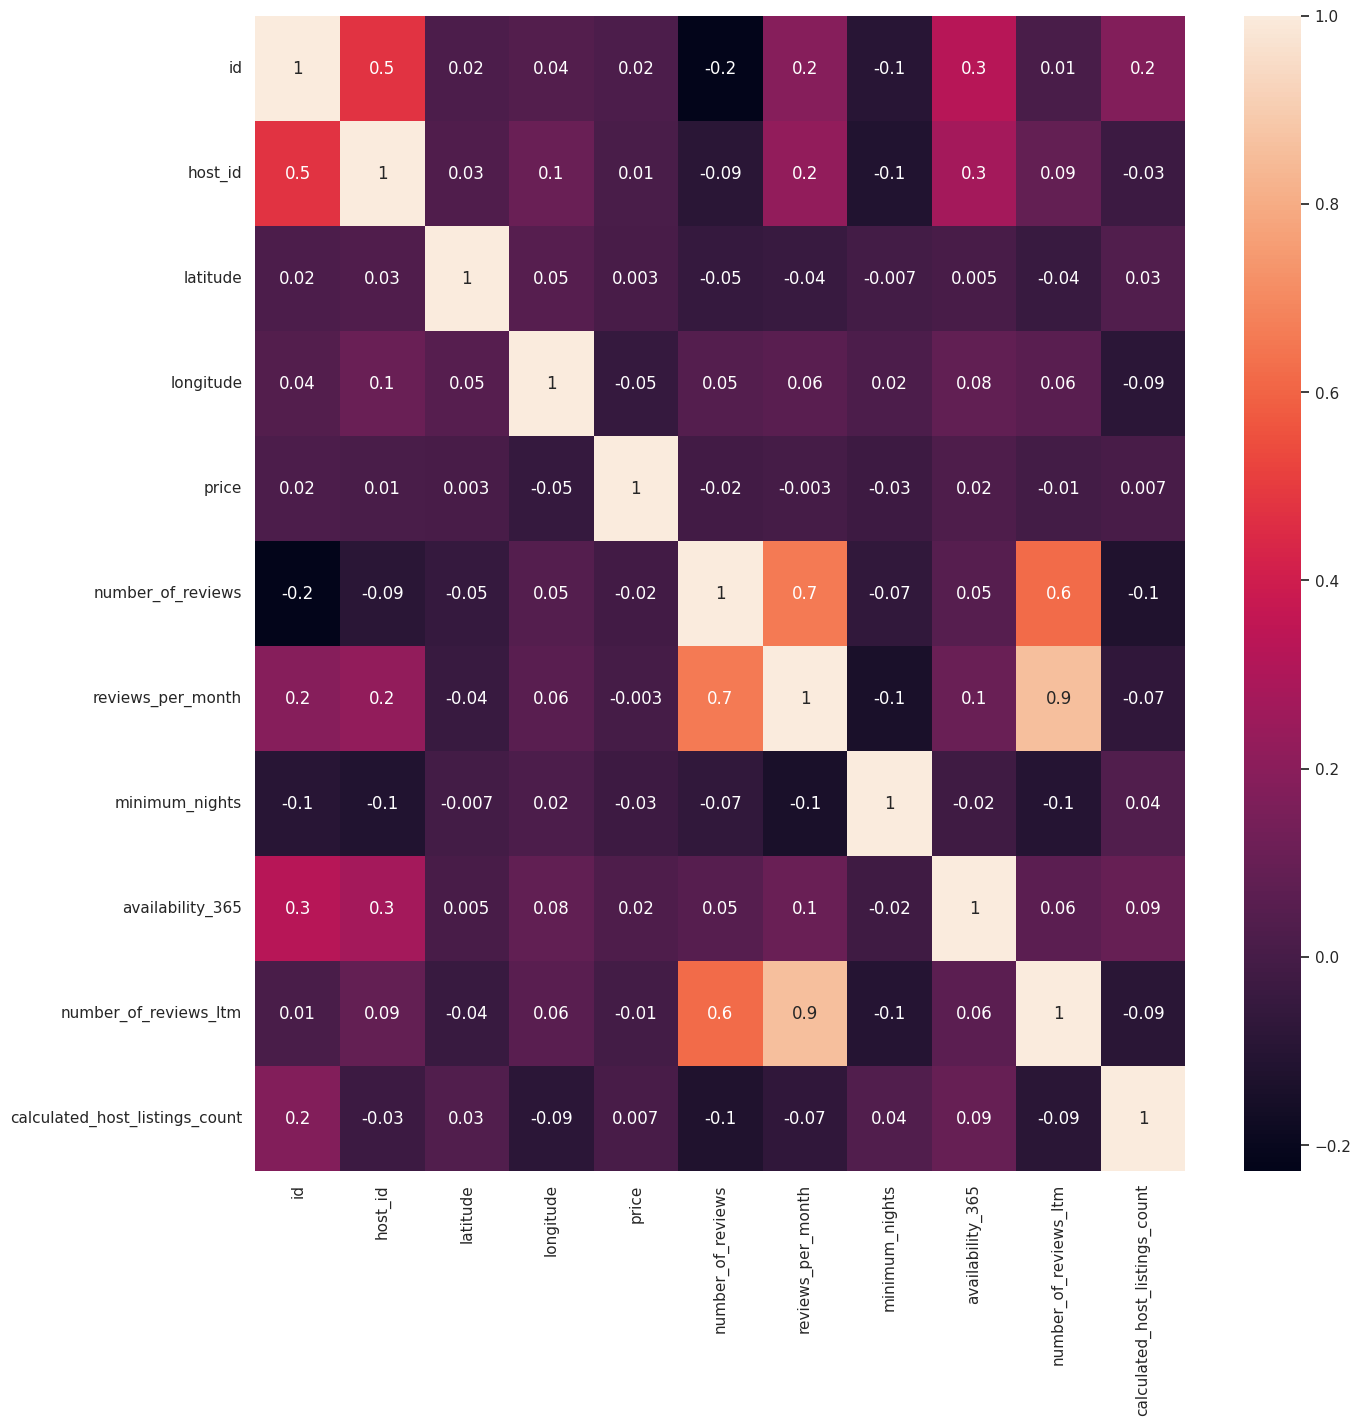

In [129]:
plt.figure(figsize=(15,15))
sns.heatmap(important_features_df.corr(numeric_only=True),annot=True,fmt='.1g')
plt.show()

# **Describe Data**


In [130]:
important_features_df.describe()

,id,host_id,latitude,longitude,price,number_of_reviews,reviews_per_month,minimum_nights,availability_365,number_of_reviews_ltm,calculated_host_listings_count
count,3.931900e+04,3.931900e+04,39319.000000,39319.000000,24277.000000,39319.000000,27514.000000,39319.000000,39319.000000,39319.000000,39319.000000
mean,3.354009e+17,1.628209e+08,40.729172,-73.946640,205.272892,24.918106,0.927277,29.367125,146.682418,5.365447,48.610468
std,4.272047e+17,1.757040e+08,0.056337,0.054622,993.318776,58.654299,1.683886,28.814873,144.589719,16.561050,151.570957
min,2.595000e+03,1.678000e+03,40.500314,-74.251907,8.000000,0.000000,0.010000,1.000000,0.000000,0.000000,1.000000
25%,2.042637e+07,1.692691e+07,40.688880,-73.983120,80.000000,0.000000,0.100000,30.000000,0.000000,0.000000,1.000000
50%,4.731606e+07,8.081323e+07,40.726368,-73.954370,130.000000,4.000000,0.340000,30.000000,95.000000,0.000000,1.000000
75%,7.920235e+17,2.934481e+08,40.762650,-73.927380,217.000000,21.000000,1.240000,30.000000,288.000000,4.000000,7.000000
max,1.106684e+18,5.657054e+08,40.911380,-73.713650,100000.000000,1897.000000,86.030000,1250.000000,365.000000,1034.000000,842.000000


In [131]:
important_features_df.head(1)

,id,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,name,room_type,price,number_of_reviews,reviews_per_month,minimum_nights,availability_365,number_of_reviews_ltm,calculated_host_listings_count,last_review,license
0,816783428767938211,47125955,Rebeca,Queens,Long Island City,40.761327,-73.926758,Cool studio 3 min from subway!,Entire home/apt,110.0,9,0.96,30,363,9,2,2023-09-25,NaN


In [132]:
percentage_of_data_having_availbility_0 = round(len(important_features_df[important_features_df['availability_365'] == 0])/len(important_features_df['availability_365'])*100,2)

In [133]:
print(f'Percentage of hosts have Zeror avaialbility per year id {percentage_of_data_having_availbility_0} %')

Percentage of hosts have Zeror avaialbility per year id 36.49 %


In [134]:
important_features_df[important_features_df['availability_365'] == 0].groupby(['last_review']).size().sort_values(ascending=False).head(20)

last_review
2020-01-01    118
2020-01-02     79
2019-01-01     64
2018-01-01     64
2023-09-04     43
2016-01-05     39
2020-01-03     38
2016-01-03     35
2017-01-01     35
2019-01-02     35
2020-03-15     34
2017-01-02     33
2016-01-02     33
2023-01-01     32
2020-02-16     32
2024-02-19     31
2018-01-02     30
2020-03-08     29
2019-12-29     28
2016-01-01     28
dtype: int64

In [135]:
cleaned_df['host_name'].value_counts().sort_values(ascending=False).iloc[:10]

host_name
Blueground         842
Eugene             635
RoomPicks          377
Michael            360
June               329
Kristina           309
Urban Furnished    300
David              290
Reservations       279
Hiroki             273
Name: count, dtype: int64

In [136]:
custom_palette = sns.color_palette("deep")

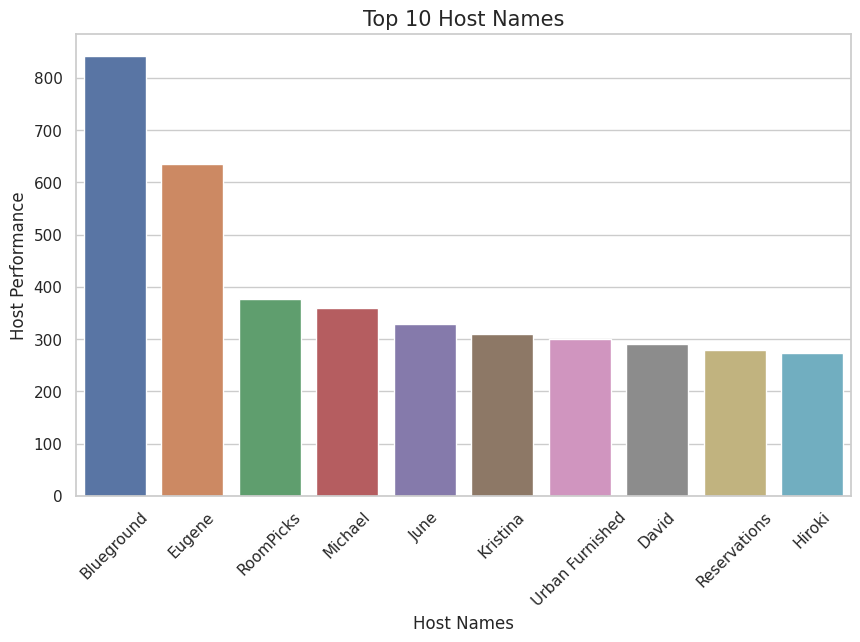

In [137]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_host_counts.index, y=top_host_counts, palette=custom_palette)
plt.title('Top 10 Host Names', fontsize=15)
plt.xlabel('Host Names')
plt.ylabel('Host Performance')
plt.xticks(rotation=45)
plt.show()


## **Observation**
**Host name is the name of the host who listed the hotel in the airbnb.**
**It looks like the Blueground has the largest booking under his name with 842 bookings**
**Eugene is the host name with 635 bookings**

In [139]:
df['host_id'].value_counts().reset_index().iloc[:10]

,host_id,count
0,107434423,842
1,3223938,628
2,305240193,320
3,496932087,279
4,19303369,273
5,200239515,254
6,162280872,250
7,204704622,235
8,496944100,180
9,501499086,166


In [140]:
top_host_ids = df['host_id'].value_counts().reset_index().iloc[:10]
custom_palette = sns.color_palette("deep")

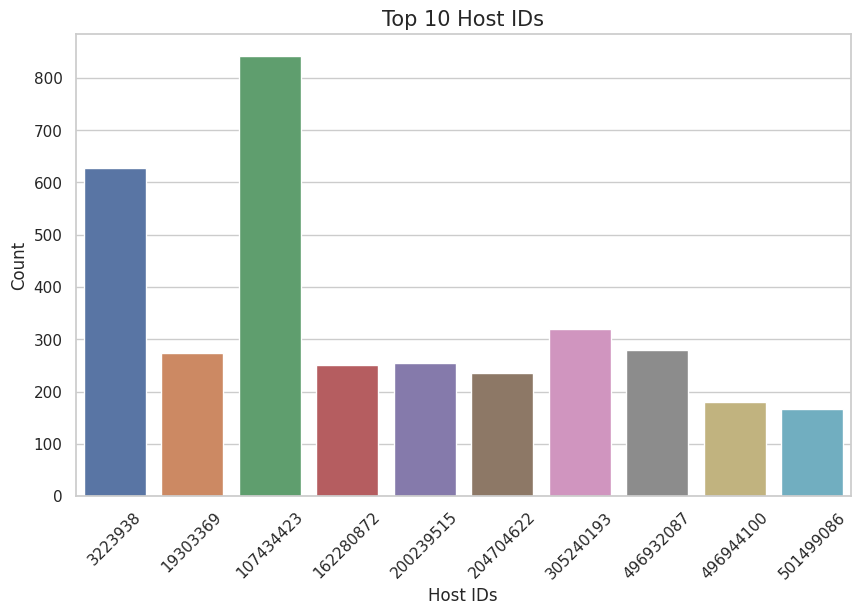

In [141]:
plt.figure(figsize=(10, 6))
sns.barplot(x='host_id', y='count', data=top_host_ids, palette=custom_palette)
plt.title('Top 10 Host IDs', fontsize=15)
plt.xlabel('Host IDs')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## **Observation**
**1-We can see that there is a good distribution between top 10 hosts with the most listings.**

**2-third host has more than 700+ listings.**


In [142]:
cleaned_df['price'] = pd.to_numeric(cleaned_df['price'].fillna('').astype(str).apply(lambda price: price[1:].replace(',', '')), errors='coerce')

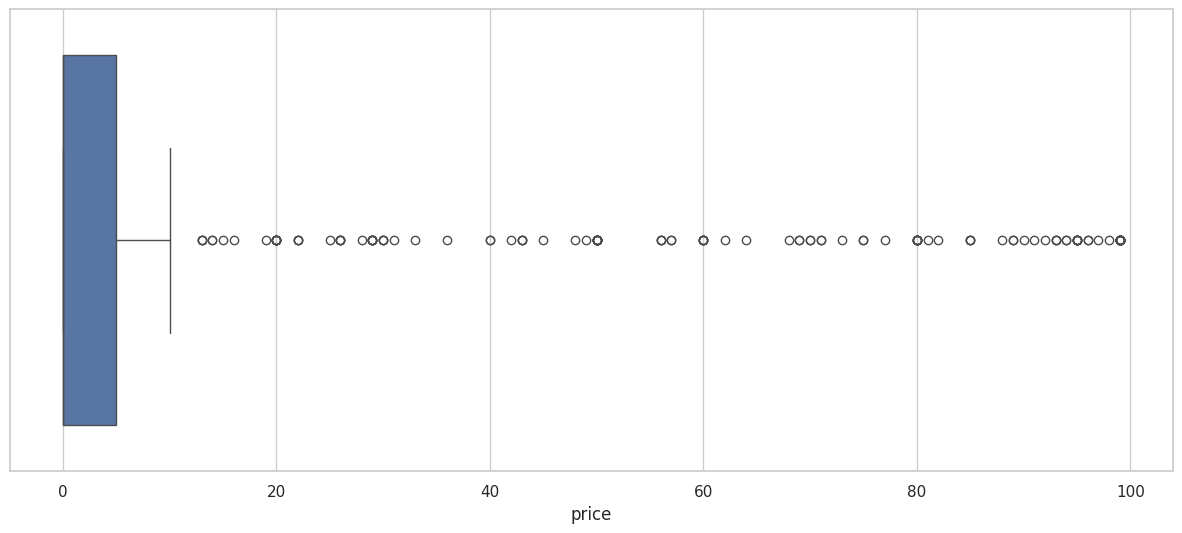

In [143]:
plt.figure(figsize=(15,6))
sns.boxplot(x = cleaned_df['price'])
plt.show()

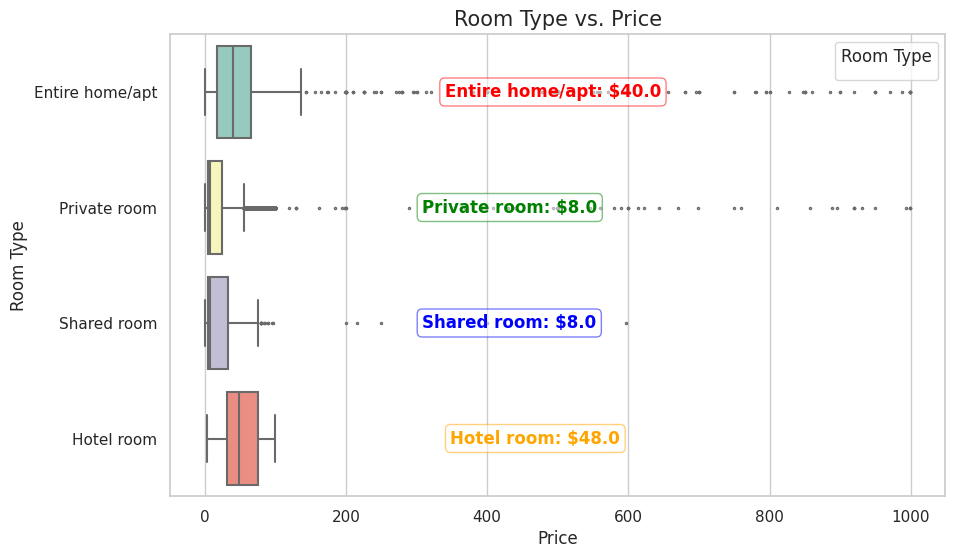

In [144]:
plt.figure(figsize=(10, 6))
sns.set_theme(style='whitegrid')
sns.boxplot(y='room_type', x='price', hue='room_type', palette='Set3', linewidth=1.5, fliersize=1.5, data=df_price)

# Add annotations with different colors and boxes
annotation_colors = ['red', 'green', 'blue', 'orange', 'purple']  # Add more colors if needed
colors = sns.color_palette('Set3', len(df_price['room_type'].unique()))
for i, room_type in enumerate(df_price['room_type'].unique()):
    median_price = df_price[df_price['room_type'] == room_type]['price'].median()
    color_index = i % len(annotation_colors)  # Cycle through annotation_colors
    plt.text(median_price + 300, i, f'{room_type}: ${median_price}', ha='left', va='center', fontsize=12, color=annotation_colors[color_index], weight='bold', bbox=dict(facecolor='white', alpha=0.5, edgecolor=annotation_colors[color_index], boxstyle='round,pad=0.3'))

plt.title('Room Type vs. Price', fontsize=15)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Room Type', fontsize=12)
plt.legend(title='Room Type')
plt.show()



**To investigate the numerous outliers in price within each** **room type category, let's delve into the reasons** **behind the exceptionally high prices. This exploration will** **shed light on what factors contribute to hosts** **commanding such high prices for their rooms.**

In [145]:
cleaned_df['price'].describe()

count    24277.000000
mean         2.320715
std          6.006817
min          0.000000
25%          0.000000
50%          0.000000
75%          5.000000
max         99.000000
Name: price, dtype: float64

<ipython-input-146-c533185d4107>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




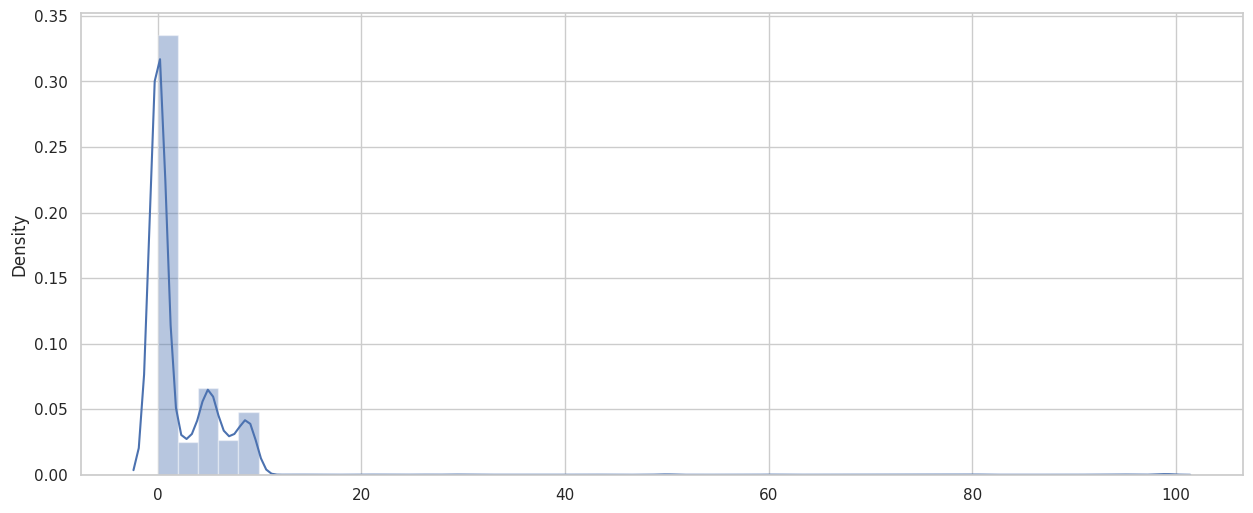

In [146]:
plt.figure(figsize=(15,6))
sns.distplot(x = cleaned_df['price'])
plt.show()

In [147]:
cleaned_df['room_type'].value_counts()

room_type
Entire home/apt    20735
Private room       17761
Shared room          555
Hotel room           268
Name: count, dtype: int64

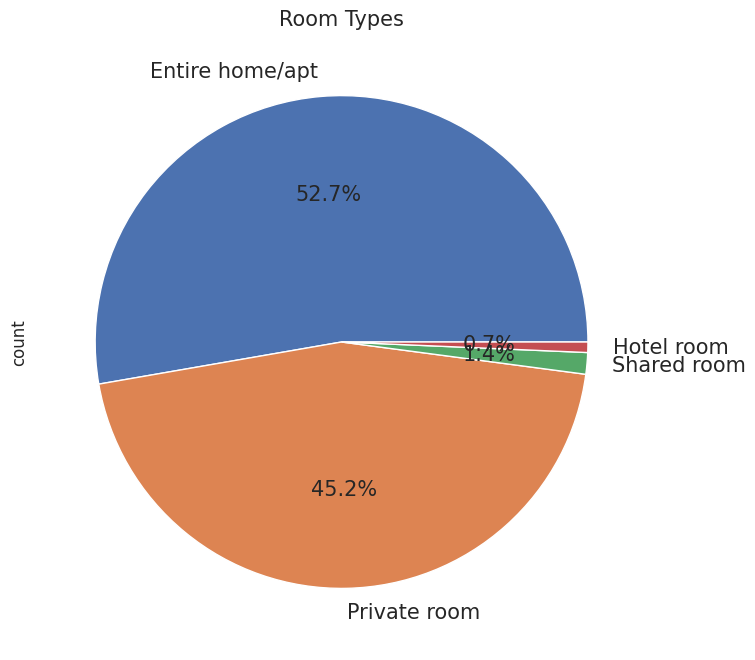

In [148]:
plt.figure(figsize=(8,5))
cleaned_df['room_type'].value_counts().plot(kind = 'pie', figsize = (8,8), fontsize = 15, autopct = '%1.1f%%')
plt.title("Room Types", fontsize = 15)
plt.show()

In [149]:
cleaned_df.groupby(['room_type'])['price'].mean().reset_index()

,room_type,price
0,Entire home/apt,3.138354
1,Hotel room,3.865031
2,Private room,1.307736
3,Shared room,1.349296


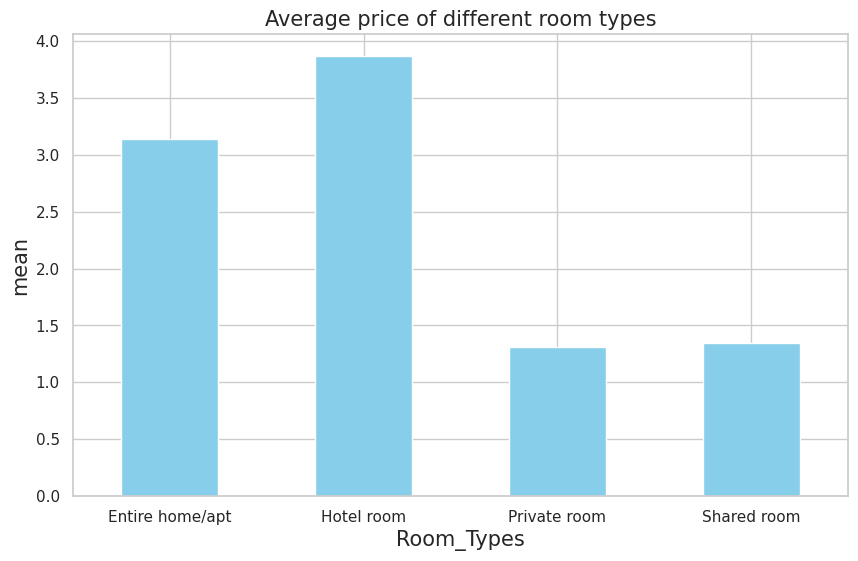

In [150]:
cleaned_df.groupby(['room_type'])['price'].mean().plot(kind='bar', figsize = (10,6), color = 'skyblue')
plt.xticks( rotation = 360)
plt.title("Average price of different room types", fontsize = 15)
plt.xlabel('Room_Types', fontsize = 15)
plt.ylabel('mean', fontsize = 15)
plt.show()

In [151]:
cleaned_df.groupby(['room_type'])['price'].describe()

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,13198.0,3.138354,6.283165,0.0,0.0,1.0,5.0,99.0
Hotel room,163.0,3.865031,3.310133,0.0,0.0,4.0,7.0,9.0
Private room,10561.0,1.307736,5.499241,0.0,0.0,0.0,0.0,99.0
Shared room,355.0,1.349296,6.156776,0.0,0.0,0.0,0.0,96.0


from matplotlib import pyplot as plt
_df_16['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17['mean'].plot(kind='hist', bins=20, title='mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18['std'].plot(kind='hist', bins=20, title='std')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19['50%'].plot(kind='hist', bins=20, title='50%')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20.plot(kind='scatter', x='count', y='mean', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_21.plot(kind='scatter', x='mean', y='std', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22.plot(kind='scatter', x='std', y='50%', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_23.plot(kind='scatter', x='50%', y='75%', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['min']
  ys = series['count']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_24.sort_values('min', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('min')
_ = plt.ylabel('count')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['min']
  ys = series['mean']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_25.sort_values('min', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('min')
_ = plt.ylabel('mean')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['min']
  ys = series['std']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_26.sort_values('min', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('min')
_ = plt.ylabel('std')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['min']
  ys = series['50%']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_27.sort_values('min', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('min')
_ = plt.ylabel('50%')

from matplotlib import pyplot as plt
_df_28['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_29['mean'].plot(kind='line', figsize=(8, 4), title='mean')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_30['std'].plot(kind='line', figsize=(8, 4), title='std')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_31['50%'].plot(kind='line', figsize=(8, 4), title='50%')
plt.gca().spines[['top', 'right']].set_visible(False)

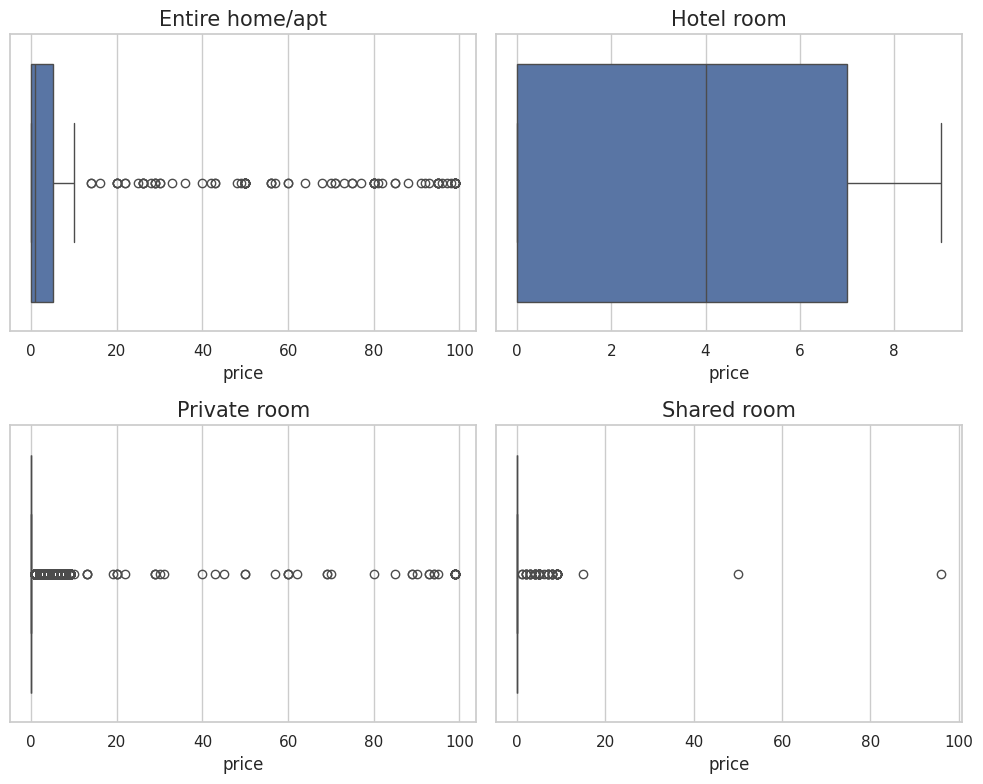

In [154]:
plt.figure(figsize=(10, 8))

# Plot for Entire home/apt
plt.subplot(2, 2, 1)
sns.boxplot(x='price', data=cleaned_df[cleaned_df['room_type'] == 'Entire home/apt'])
plt.title("Entire home/apt", fontsize=15)

# Plot for Hotel room
plt.subplot(2, 2, 2)
sns.boxplot(x='price', data=cleaned_df[cleaned_df['room_type'] == 'Hotel room'])
plt.title("Hotel room", fontsize=15)

# Plot for Private room
plt.subplot(2, 2, 3)
sns.boxplot(x='price', data=cleaned_df[cleaned_df['room_type'] == 'Private room'])
plt.title("Private room", fontsize=15)

# Plot for Shared room
plt.subplot(2, 2, 4)
sns.boxplot(x='price', data=cleaned_df[cleaned_df['room_type'] == 'Shared room'])
plt.title("Shared room", fontsize=15)

plt.tight_layout()
plt.show()
